In [ ]:
#pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 4.7 MB/s 
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=26dab0bb782495368c890109ffb76782c20f6cf12f6d94be58287825cfdea590
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import numpy as np
import pandas as pd
import os
import io

import re
import string
import csv
from string import punctuation

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

import spacy
nlp = spacy.load('en_core_web_sm')

import yellowbrick

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import freqdist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm

!pip install transformers
from transformers import AutoModel, AutoTokenizer
model_name = "distilroberta-base"
pt_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

!pip install yake
import yake

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.9 MB/s 
     |████████████████████████████████| 6.6 MB 6.2 MB/s 
     |████████████████████████████████| 101 kB 11.2 MB/s 


Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 3.2 MB/s 
     |████████████████████████████████| 132 kB 11.2 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73988 sha256=3cb7cdf48e882cfe8b40d4c0eb8727cf1d122182ae155a0a657d5b3eb4db434f
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the current working directory to specified path
os.chdir('drive/My Drive/Colab Notebooks/Data-Source/Auto_Text_Summarization/')

In [ ]:
dfTrain = pd.read_csv('train.csv', error_bad_lines = False, engine = "python")
dfTest = pd.read_csv('test.csv')

print(dfTrain.shape)
print(dfTrain.head())

print(dfTest.shape)
print(dfTest.head())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 148969: unexpected end of data


(148967, 3)
                                         id  \
0  0001d1afc246a7964130f43ae940af6bc6c57f01   
1  0002095e55fcbd3a2f366d9bf92a95433dc305ef   
2  00027e965c8264c35cc1bc55556db388da82b07f   
3  0002c17436637c4fe1837c935c04de47adb18e9a   
4  0003ad6ef0c37534f80b55b4235108024b407f0b   

                                             article  \
0  By . Associated Press . PUBLISHED: . 14:11 EST...   
1  (CNN) -- Ralph Mata was an internal affairs li...   
2  A drunk driver who killed a young woman in a h...   
3  (CNN) -- With a breezy sweep of his pen Presid...   
4  Fleetwood are the only team still to have a 10...   

                                          highlights  
0  Bishop John Folda, of North Dakota, is taking ...  
1  Criminal complaint: Cop used his role to help ...  
2  Craig Eccleston-Todd, 27, had drunk at least t...  
3  Nina dos Santos says Europe must be ready to a...  
4  Fleetwood top of League One after 2-0 win at S...  
(11490, 3)
                           

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def clean_text(txt, remove_stopwords=True):
    txt = txt.lower()
    txt = txt.split()
    tmp = []
    for word in txt:
        if word in contractions:
            tmp.append(contractions[word])
        else:
            tmp.append(word)
    txt = ' '.join(tmp)
    
    txt = re.sub(r'https?:\/\/.*[\r\n]*', '', txt, flags=re.MULTILINE)
    txt = re.sub(r'\<a href', ' ', txt)
    txt = re.sub(r'&amp;', '', txt) 
    txt = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', txt)
    txt = re.sub(r'<br />', ' ', txt)
    txt = re.sub(r'\'', ' ', txt)

    if remove_stopwords:
      txt = txt.split()
      stops = set(stopwords.words('english'))
      txt = [w for w in txt if w not in stops]
      txt = ' '.join(txt)
        
    return txt

In [ ]:
# initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemma_text(txt, remove_stopwords=True):      
    txt = clean_text(txt, remove_stopwords)  
    # here token length less than 3 characters is not considered as Noun
    sent = [lemmatizer.lemmatize(word, pos='n') for word in word_tokenize(txt) if len(word) > 2 and not word in set(stopwords.words('english'))]
    return " ".join(sent)

In [ ]:
clean_summaries = []
for summary in tqdm(dfTrain.highlights, desc="Progress Bar Highlights..."):
    clean_summaries.append(lemma_text(summary, remove_stopwords=False))
print('Cleaning Summaries Complete')
    
clean_texts = []
for inputTxt in tqdm(dfTrain.article, desc="Progress Bar Article..."):
    clean_texts.append(lemma_text(inputTxt))
print('Cleaning Texts Complete')

Progress Bar Highlights...: 100%|██████████| 148967/148967 [15:17<00:00, 162.42it/s]


Cleaning Summaries Complete


Progress Bar Article...: 100%|██████████| 148967/148967 [2:13:25<00:00, 18.61it/s]

Cleaning Texts Complete


In [ ]:
d = {"article": clean_texts, "summary": clean_summaries}
clean_df = pd.DataFrame(d)
print("The DataFrame ")
print(clean_df)

The DataFrame 
                                                  article  \
0       associated press published est october 2013 up...   
1       cnn ralph mata internal affair lieutenant miam...   
2       drunk driver killed young woman head crash che...   
3       cnn breezy sweep pen president vladimir putin ...   
4       fleetwood team still 100 record sky bet league...   
...                                                   ...   
148962  cnn missile launch component moved east coast ...   
148963  james nye published est september 2012 updated...   
148964  stunned homeowner filmed setting fire highly f...   
148965  beth stebner published est july 2012 updated e...   
148966  arm aloft syrian fighter celebrate moment noto...   

                                                  summary  
0       bishop john folda north dakota taking time dia...  
1       criminal complaint cop used role help cocaine ...  
2       craig eccleston todd drunk least three pint dr...  
3       nina

In [ ]:
clean_df.head()

,article,summary
0,associated press published est october 2013 up...,bishop john folda north dakota taking time dia...
1,cnn ralph mata internal affair lieutenant miam...,criminal complaint cop used role help cocaine ...
2,drunk driver killed young woman head crash che...,craig eccleston todd drunk least three pint dr...
3,cnn breezy sweep pen president vladimir putin ...,nina do santos say europe must ready accept sa...
4,fleetwood team still 100 record sky bet league...,fleetwood top league one win scunthorpe peterb...


In [ ]:
# Saving into disc for future use
clean_df.to_csv('clean_train.csv', index=False)

In [ ]:
clean_df_ori = clean_df.copy()
clean_df_ori.shape

(148967, 2)

# Read the cleaned file which was created from the training dataset

In [ ]:
clean_df = pd.read_csv('clean_train.csv')

print(clean_df.shape)
print(clean_df.head())

(148967, 2)
                                             article  \
0  associated press published est october 2013 up...   
1  cnn ralph mata internal affair lieutenant miam...   
2  drunk driver killed young woman head crash che...   
3  cnn breezy sweep pen president vladimir putin ...   
4  fleetwood team still 100 record sky bet league...   

                                             summary  
0  bishop john folda north dakota taking time dia...  
1  criminal complaint cop used role help cocaine ...  
2  craig eccleston todd drunk least three pint dr...  
3  nina do santos say europe must ready accept sa...  
4  fleetwood top league one win scunthorpe peterb...  


In [ ]:
stop_words2 = text.ENGLISH_STOP_WORDS.union(['said'])
print(stop_words2)

frozenset({'i', 'whereafter', 'however', 'keep', 'part', 'there', 'sometimes', 'few', 'yourselves', 'fifty', 'whereas', 'almost', 'enough', 'it', 'detail', 'side', 'then', 'only', 'by', 'thin', 'four', 'may', 'but', 're', 'every', 'found', 'others', 'sincere', 'perhaps', 'etc', 'could', 'often', 'un', 'whoever', 'my', 'ltd', 'anywhere', 'everywhere', 'will', 'our', 'anything', 'describe', 'eleven', 'also', 'hence', 'twelve', 'serious', 'not', 'indeed', 'see', 'else', 'might', 'been', 'how', 'than', 'cannot', 'whether', 'fire', 'myself', 'bill', 'here', 'done', 'due', 'everyone', 'therein', 'cant', 'his', 'is', 'all', 'which', 'up', 'back', 'thereafter', 'herself', 'latter', 'him', 'except', 'mill', 'put', 'across', 'bottom', 'said', 'before', 'five', 'former', 'amongst', 'out', 'hers', 'are', 'through', 'three', 'more', 'me', 'that', 'where', 'each', 'being', 'something', 'the', 'one', 'on', 'mostly', 'interest', 'towards', 'per', 'without', 'first', 'please', 'together', 'eight', 'sin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


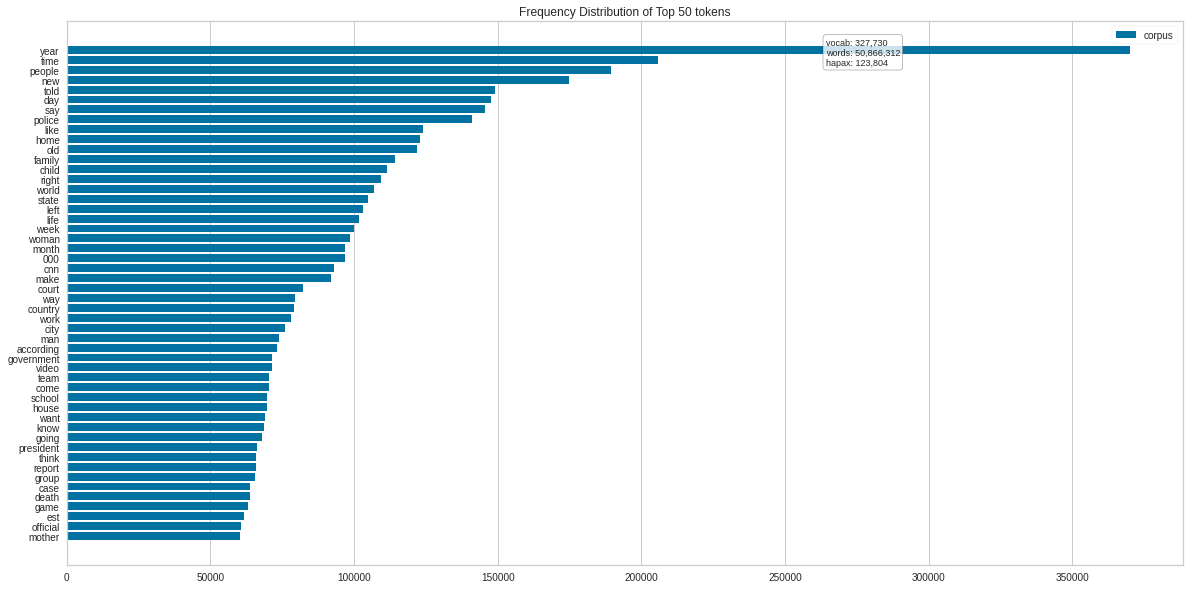

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words2)
docs = vectorizer.fit_transform(clean_df.article)
features = vectorizer.get_feature_names()
plt.figure(figsize=(20,10))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()
#freqdist(features, docs, orient='v')

In [ ]:
#set paths for sentiment lexicons
negfile = 'negative-words.txt'
posfile = 'positive-words.txt'
negative = io.open(negfile, 'r', encoding='utf8').read().split('\n')
positive = io.open(posfile, 'r', encoding='utf8').read().split('\n')

print(len(negative))
print(len(positive))

4783
2007


In [ ]:
result = []

positive_list = []
negative_list = []
ratio_list = []

for inputTxt in clean_df.article:
  tokens = [lemmatizer.lemmatize(word, pos='n') for word in word_tokenize(inputTxt) if len(word) > 2 and not word in set(stopwords.words('english'))]
  
  positive_words = []
  negative_words = []
  for t in tokens:
    if t in negative: 
      negative_words.append(t)
      negative_list.append(t)
    elif t in positive:
      positive_words.append(t)
      positive_list.append(t)

  ratio = float(len(positive_words)+1) / float(len(positive_words)+len(negative_words)+2) - 0.5
  ratio_list.append(ratio)

  if len(ratio_list) != 0:
    score = sum(ratio_list) / float(len(ratio_list)) 
  else:
    score = 0
  
  result.append(score)


In [ ]:
#adding a new column

clean_df.insert(2, 'Article_Score', result)
print('---------------After adding a new column------------')
print(clean_df.shape)
print(clean_df.head())

---------------After adding a new column------------
(11490, 3)
                                                text  \
0  ever noticed plane seat appear getting smaller...   
1  drunk teenage boy rescued security jumping lio...   
2  dougie freedman verge agreeing new two year de...   
3  liverpool target neto also wanted psg club spa...   
4  bruce jenner break silence two hour interview ...   

                                             summary     Score  
0  expert question packed plane putting passenger... -0.142857  
1  drunk teenage boy climbed lion enclosure zoo w... -0.139610  
2  nottingham forest close extending dougie freed... -0.021645  
3  fiorentina goalkeeper neto linked liverpool ar...  0.008766  
4  tell interview reality star air friday april c... -0.031876  


In [ ]:
clean_df.head()

,text,summary,Score
0,ever noticed plane seat appear getting smaller...,expert question packed plane putting passenger...,-0.142857
1,drunk teenage boy rescued security jumping lio...,drunk teenage boy climbed lion enclosure zoo w...,-0.139610
2,dougie freedman verge agreeing new two year de...,nottingham forest close extending dougie freed...,-0.021645
3,liverpool target neto also wanted psg club spa...,fiorentina goalkeeper neto linked liverpool ar...,0.008766
4,bruce jenner break silence two hour interview ...,tell interview reality star air friday april c...,-0.031876


In [ ]:
# Saving the dataframe into file for re-purpose
filename = 'clean_df.csv'
clean_df.to_csv(filename, index=False)

In [ ]:
clean_df.index

RangeIndex(start=0, stop=11490, step=1)

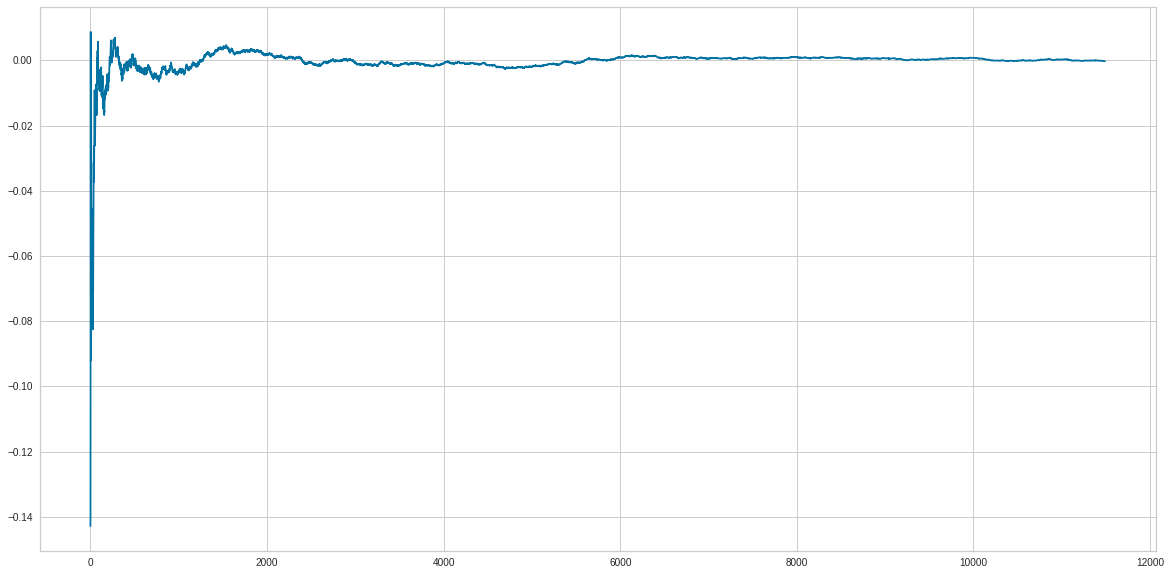

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(clean_df.index, clean_df.Article_Score)

In [ ]:
# for summary or highlights
result_s = []

positive_list_s = []
negative_list_s = []
ratio_list_s = []

for sumTxt in clean_df.summary:
  tokens_s = [lemmatizer.lemmatize(word, pos='n') for word in word_tokenize(sumTxt) if len(word) > 2 and not word in set(stopwords.words('english'))]
  
  positive_words_s = []
  negative_words_s = []
  for t in tokens_s:
    if t in negative: 
      negative_words_s.append(t)
      negative_list_s.append(t)
    elif t in positive:
      positive_words_s.append(t)
      positive_list_s.append(t)

  ratio = float(len(positive_words_s)+1) / float(len(positive_words_s)+len(negative_words_s)+2) - 0.5
  ratio_list_s.append(ratio)

  if len(ratio_list_s) != 0:
    score = sum(ratio_list_s) / float(len(ratio_list_s)) 
  else:
    score = 0
  
  result_s.append(score)


In [ ]:
#adding a new column

clean_df.insert(3, 'Summary_Score', result_s)
print('---------------After adding a new column------------')
print(clean_df.shape)
print(clean_df.head())

---------------After adding a new column------------
(11490, 4)
                                                text  \
0  ever noticed plane seat appear getting smaller...   
1  drunk teenage boy rescued security jumping lio...   
2  dougie freedman verge agreeing new two year de...   
3  liverpool target neto also wanted psg club spa...   
4  bruce jenner break silence two hour interview ...   

                                             summary     Score  Summary_Score  
0  expert question packed plane putting passenger... -0.142857      -0.166667  
1  drunk teenage boy climbed lion enclosure zoo w... -0.139610      -0.166667  
2  nottingham forest close extending dougie freed... -0.021645      -0.055556  
3  fiorentina goalkeeper neto linked liverpool ar...  0.008766      -0.041667  
4  tell interview reality star air friday april c... -0.031876      -0.093333  


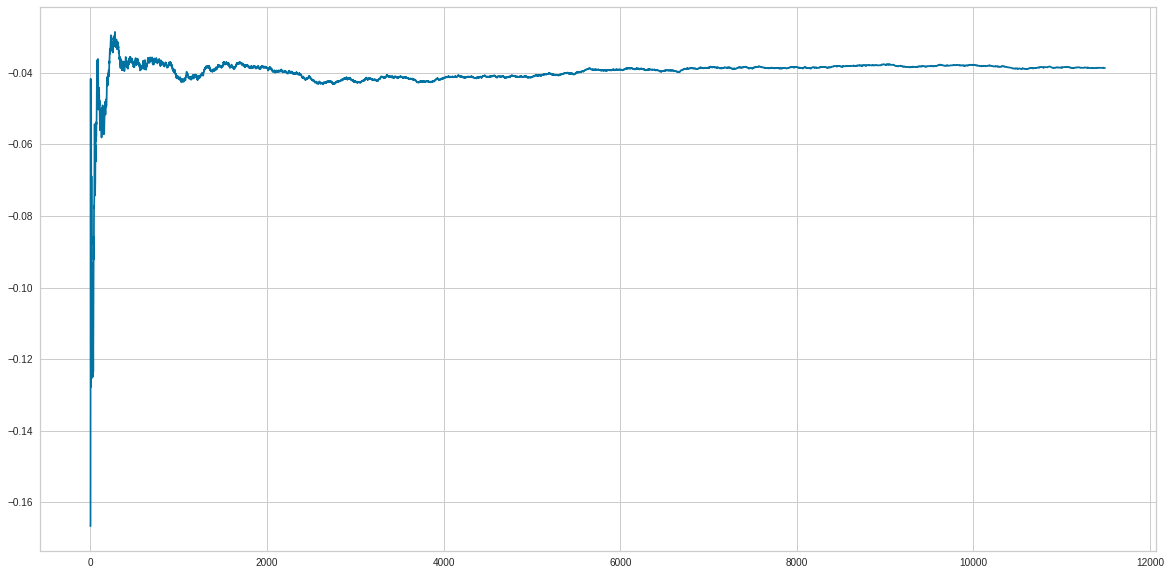

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(clean_df.index, clean_df.Summary_Score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


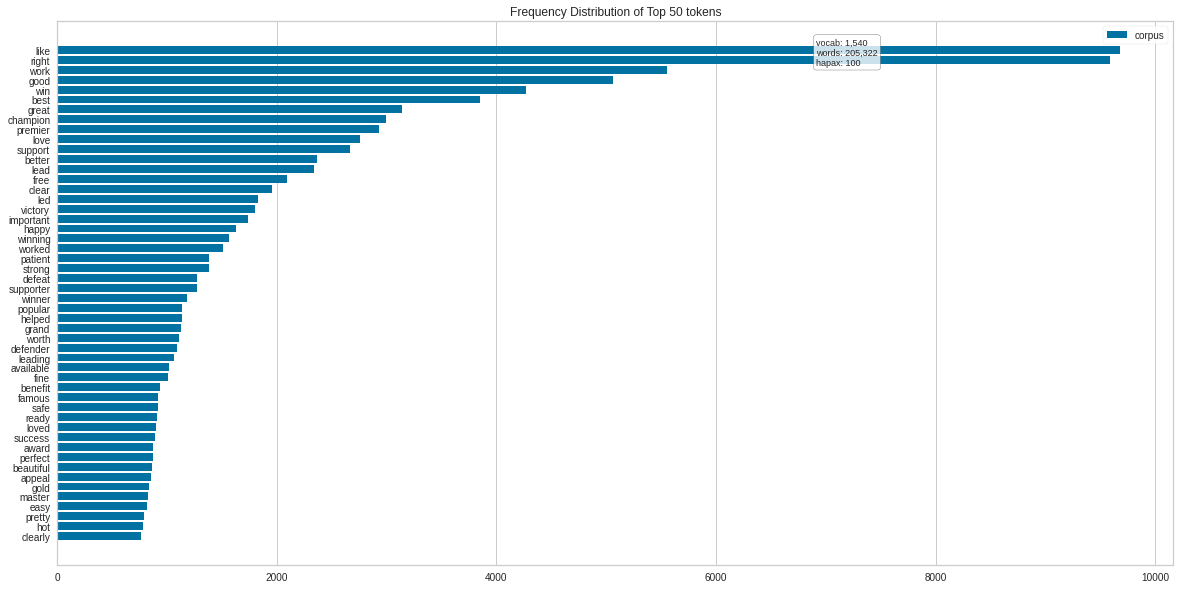

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words2)
docs = vectorizer.fit_transform(positive_list)
features = vectorizer.get_feature_names()
plt.figure(figsize=(20,10))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


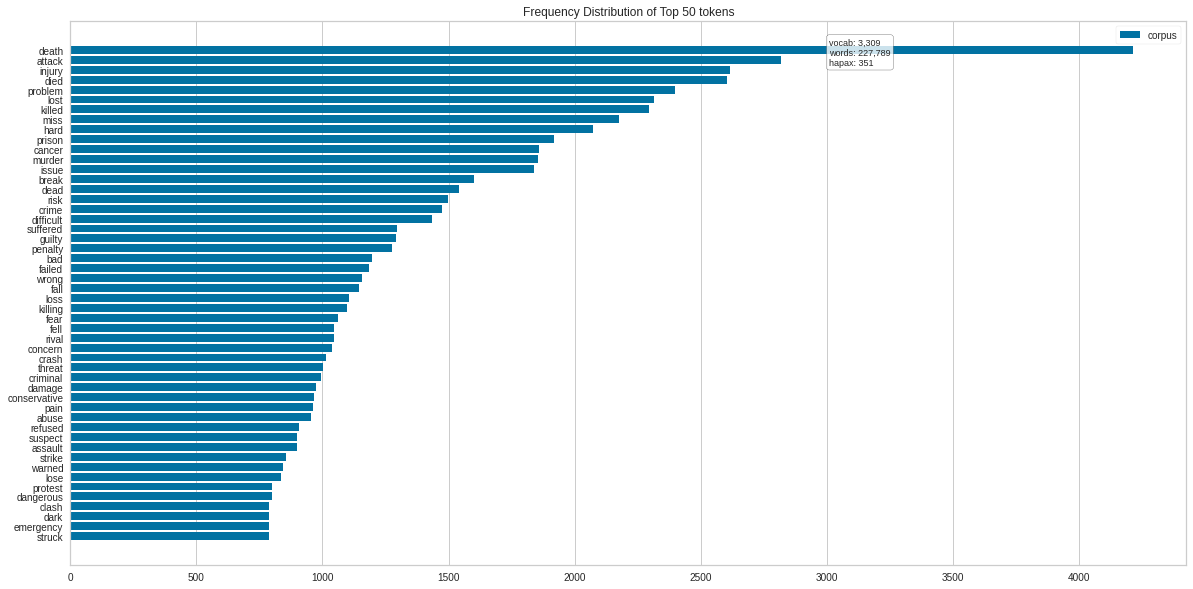

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words2)
docs = vectorizer.fit_transform(negative_list)
features = vectorizer.get_feature_names()
plt.figure(figsize=(20,10))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

In [ ]:
# Helper function
def plot_common_words(count_data, count_vectorizer):
    ''' Draw a barplot showing the tenth most common words in the data
        Input:
        - count_data: tuple, containing pairs of document-term and its ocurrencies in the text
        - count_vectorizer: CountVectorizer object
    '''
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='crest')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

Most used uni-grams in articles

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


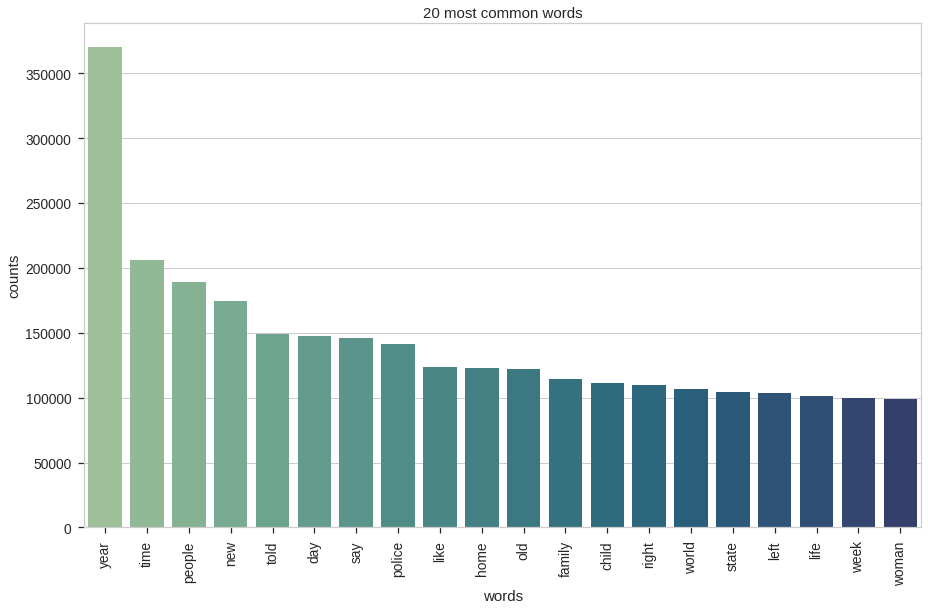

In [ ]:
# Initialise the count vectorizer
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=10000,stop_words=stop_words2)
# Apply the count vectorized method to our cleaned data
tf = tf_vectorizer.fit_transform(clean_df.article)
# Build the Document Term Matrix
tf_feature_names = tf_vectorizer.get_feature_names()
#doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
#print(doc_term_matrix)
plot_common_words(tf, tf_vectorizer)

Most used uni-grams in highlights

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


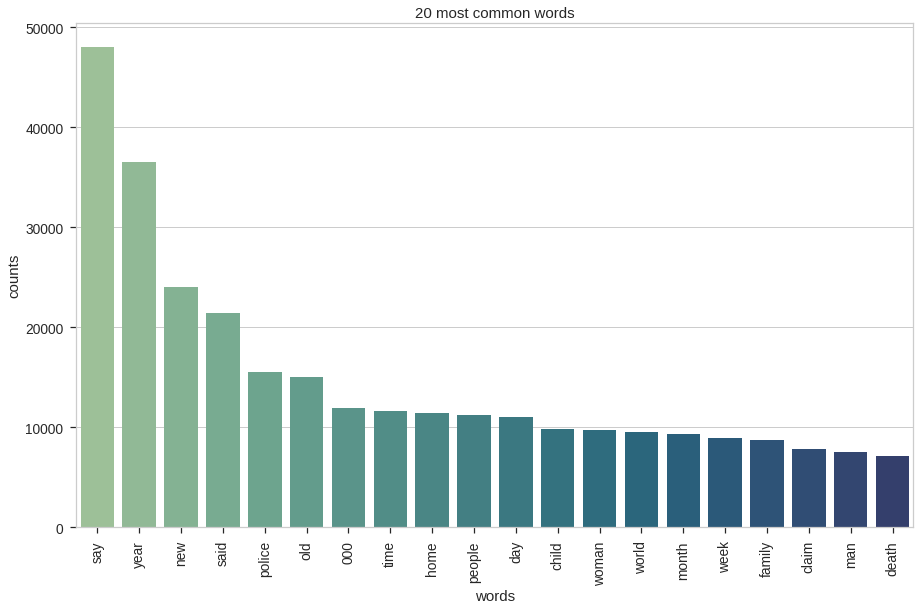

In [ ]:
# Initialise the count vectorizer
tf_vectorizer = CountVectorizer(max_df=0.9, max_features=10000,stop_words=stop_words2) #, min_df=25
# Apply the count vectorized method to our cleaned data
tf = tf_vectorizer.fit_transform(clean_df.summary)
# Build the Document Term Matrix
tf_feature_names = tf_vectorizer.get_feature_names()
#doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
#print(doc_term_matrix)
plot_common_words(tf, tf_vectorizer)

Most used bi-grams in articles

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


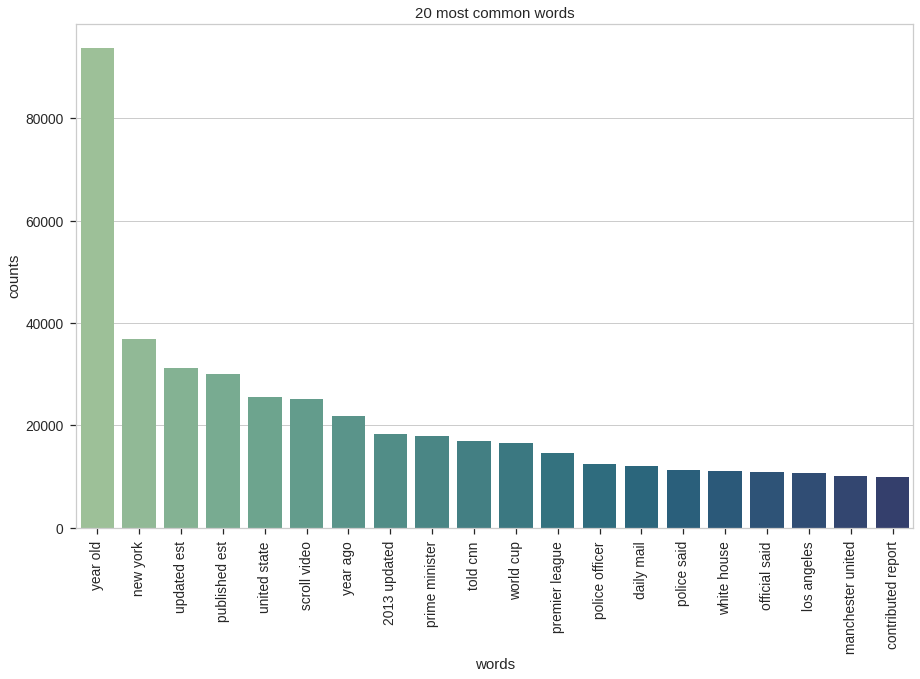

In [ ]:
# Initialise the count vectorizer
tf_vectorizer = CountVectorizer(ngram_range = (2, 2),max_df=0.9, max_features=10000,stop_words=stop_words2)
# Apply the count vectorized method to our cleaned data
tf = tf_vectorizer.fit_transform(clean_df.article)
# Build the Document Term Matrix
tf_feature_names = tf_vectorizer.get_feature_names()
#doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
#print(doc_term_matrix)
plot_common_words(tf, tf_vectorizer)

Most used bi-grams in Summary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


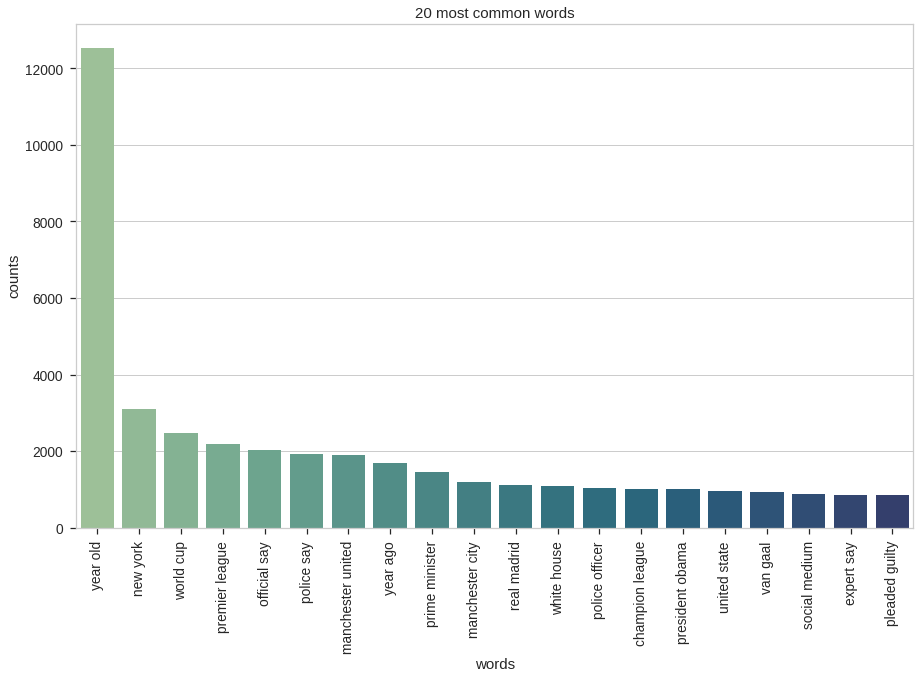

In [ ]:
# Initialise the count vectorizer
tf_vectorizer = CountVectorizer(ngram_range = (2, 2),max_df=0.9, max_features=10000, stop_words=stop_words2)
# Apply the count vectorized method to our cleaned data
tf = tf_vectorizer.fit_transform(clean_df.summary)
# Build the Document Term Matrix
tf_feature_names = tf_vectorizer.get_feature_names()
#doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
#print(doc_term_matrix)
plot_common_words(tf, tf_vectorizer)

In [ ]:
# Noun and Noun phrases extraction
def get_noun_phrases_spacy(myText):
    """
    Noun phrase extraction using spacy from a given text.
    """
    try:
        doc = nlp(myText)
        noun_phrases = list(set(chunk.text.strip().lower()
                            for chunk in doc.noun_chunks))
        return noun_phrases

    except Exception as ex:
        print(f"\nException:common_utils.get_noun_phrases_spacy:\n{str(ex)}")
        return None

In [ ]:
# create embedding from the pre-trained model
def get_candidate_embeddings(all_nouns):
    """
    Input params:
    all_nouns=list of nouns/noun-phrases

    This function tokenizes and then creates embeddings from the input string.
    """
    try:
        candidate_tokens = tokenizer(
            list(all_nouns),
            truncation=True,
            padding=True,
            return_tensors="pt")
        candidate_embeddings = pt_model(**candidate_tokens)["pooler_output"]
        candidate_embeddings = candidate_embeddings.detach().numpy()

        # output=matrix of embeddings, each row=embedding for every
        # noun/noun-phrases
        return candidate_embeddings

    except Exception as ex:
        print(f"\nException:common_utils.get_candidate_embeddings:\n{str(ex)}")
        return None

In [ ]:
def get_best_words(
        article_embeddings,
        summary_embeddings,
        all_nouns,
        top_kw_count):
    """
    This function compares distance between article and summary embdeddings
    of noun phrases with the help of cosine_similarity
    """
    try:
        distances = cosine_similarity(article_embeddings, summary_embeddings)
        keywords = [list(all_nouns)[index]
                    for index in distances.argsort()[0][-top_kw_count:]]
        return keywords, distances

    except Exception as ex:
        print(f"\nException:common_utils.get_best_keywords:\n{str(ex)}")
        return None

In [ ]:
# find common words mainly nouns and noub-phrases
def find_common_words(list1,list2):
  #print(type(list1[0]))
  print(list1)
  print(list2)
  list3 = list(set(list1)&set(list2))
  print(list3)
  return list3

In [ ]:
top_n_kw_count = 50
clean_df['features_article']=''
clean_df['simscore_article']=''
clean_df['features_summary']=''
clean_df['simscore_summary']=''

for index, row in tqdm(clean_df[:100].iterrows(), desc="Progress Bar..."):
    # get noun phrases using spacy. noun_phrases->list
    noun_art = get_noun_phrases_spacy(row['article'])
    noun_sum = get_noun_phrases_spacy(row['summary'])

    # get embeddings of list of noun phrases from articles and summaries
    artile_embeddings = get_candidate_embeddings(noun_art)
    summary_embeddings = get_candidate_embeddings(noun_sum)

    relevant_words_art, score_art = get_best_words(
        artile_embeddings, summary_embeddings, noun_art, int(top_n_kw_count))
    clean_df['features_article'].iloc[index] = relevant_words_art
    clean_df['simscore_article'].iloc[index] = score_art

    relevant_words_sum, score_sum = get_best_words(
        artile_embeddings, summary_embeddings, noun_sum, int(top_n_kw_count))
    clean_df['features_summary'].iloc[index] = relevant_words_sum
    clean_df['simscore_summary'].iloc[index] = score_sum

Progress Bar...: 100it [03:57,  2.37s/it]


In [ ]:
#COVERTING EVERY RECORD TO LIST
clean_df.features_article = clean_df.features_article.tolist()
clean_df.simscore_article = clean_df.simscore_article.tolist()
clean_df.features_summary = clean_df.features_summary.tolist()
clean_df.simscore_summary = clean_df.simscore_summary.tolist()

In [ ]:
# Saving into disc for future use
clean_df.to_csv('clean_embedding_features.csv', index=False)